<a href="https://colab.research.google.com/github/i-am-Aryan-Raj/Image-Recognition/blob/main/Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:05<00:00, 260MB/s]
100% 1.06G/1.06G [00:05<00:00, 217MB/s]


In [ ]:
import zipfile
zip_data = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_data.extractall('/content')
zip_data.close()

## Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = cv2.imread('/content/train/cats/cat.10073.jpg')
img

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [166, 172, 149],
        [166, 172, 149],
        [163, 167, 148]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [168, 174, 151],
        [169, 174, 153],
        [166, 170, 151]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [166, 171, 150],
        [166, 171, 150],
        [165, 169, 150]],

       ...,

       [[254, 254, 254],
        [253, 254, 252],
        [251, 251, 251],
        ...,
        [166, 174, 173],
        [163, 171, 170],
        [166, 174, 173]],

       [[254, 254, 254],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [169, 177, 176],
        [170, 178, 177],
        [170, 178, 177]],

       [[253, 252, 254],
        [253, 252, 254],
        [254, 253, 255],
        ...,
        [171, 179, 178],
        [172, 180, 179],
        [169, 177, 176]]

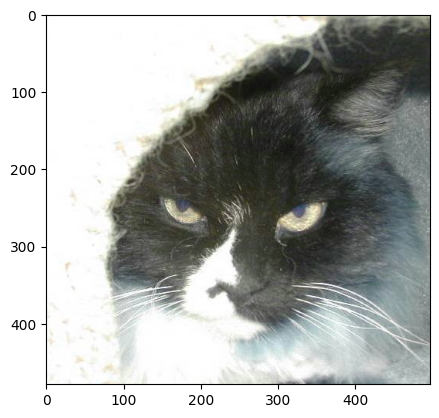

In [ ]:
plt.imshow(img)

In [ ]:
img.shape  # 3 is third parameter, i.e. rbg

(479, 497, 3)

In [ ]:
# Generators
training_set = tf.keras.utils.image_dataset_from_directory(
directory = '/content/train',
labels = "inferred",
label_mode = "int",
batch_size = 32,
image_size = (256, 256)
)
testing_set = tf.keras.utils.image_dataset_from_directory(
directory = '/content/test',
labels = "inferred",
label_mode = "int",
batch_size = 32,
image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalization
def scaling(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

In [ ]:
training_set = training_set.map(scaling)
testing_set = testing_set.map(scaling)

## The CNN Architecture

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')


In [ ]:
history = model.fit(training_set, validation_data = testing_set, epochs=10)


Epoch 1/10
625/625 [==============================] - 59s 81ms/step - loss: 0.6608 - accuracy: 0.5824 - val_loss: 0.5685 - val_accuracy: 0.7072
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5577 - accuracy: 0.7053 - val_loss: 0.5240 - val_accuracy: 0.7346
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.4746 - accuracy: 0.7666 - val_loss: 0.4718 - val_accuracy: 0.7684
Epoch 4/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3787 - accuracy: 0.8274 - val_loss: 0.5200 - val_accuracy: 0.7772
Epoch 5/10
625/625 [==============================] - 51s 80ms/step - loss: 0.2520 - accuracy: 0.8920 - val_loss: 0.6266 - val_accuracy: 0.7660
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.1494 - accuracy: 0.9414 - val_loss: 0.8481 - val_accuracy: 0.7796
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0876 - accuracy: 0.9694 - val_loss: 1.1230 - val_accuracy:

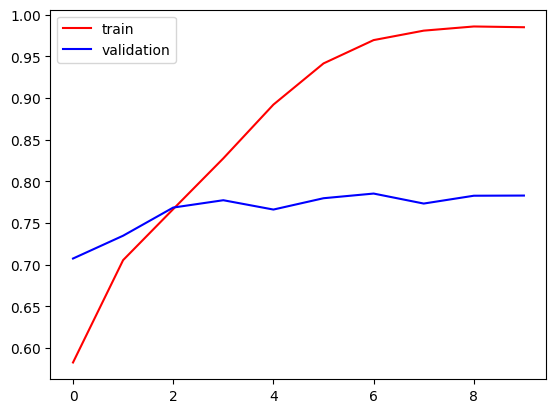

In [ ]:
# Training graph for accuracy

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

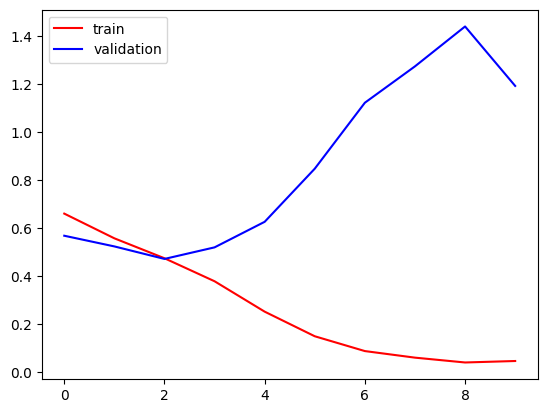

In [ ]:
# Training graph for accuracy

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


# Improving Model and coutering overfitting

Add more data (20000 is very less),
Data Augmentation,
L1/L2 Regularisation,
Batch Normalisation,
Dropout

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')


In [ ]:
history = model.fit(training_set, validation_data = testing_set, epochs=10)


Epoch 1/10
625/625 [==============================] - 81s 110ms/step - loss: 0.8696 - accuracy: 0.5678 - val_loss: 0.6274 - val_accuracy: 0.6456
Epoch 2/10
625/625 [==============================] - 69s 111ms/step - loss: 0.5917 - accuracy: 0.6857 - val_loss: 0.6235 - val_accuracy: 0.6566
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5292 - accuracy: 0.7433 - val_loss: 0.5110 - val_accuracy: 0.7440
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4617 - accuracy: 0.7884 - val_loss: 0.4378 - val_accuracy: 0.7910
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.3828 - accuracy: 0.8364 - val_loss: 0.4961 - val_accuracy: 0.7626
Epoch 6/10
625/625 [==============================] - 70s 112ms/step - loss: 0.2938 - accuracy: 0.8777 - val_loss: 0.4611 - val_accuracy: 0.7902
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2166 - accuracy: 0.9126 - val_loss: 0.4489 - val_ac

In [ ]:
# Overfitting increases with complexity of model and data

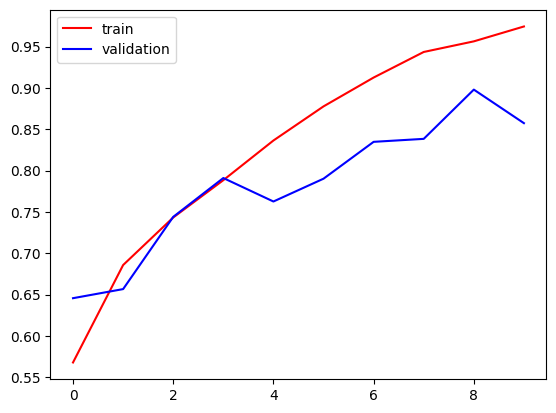

In [ ]:
# Training graph for accuracy

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

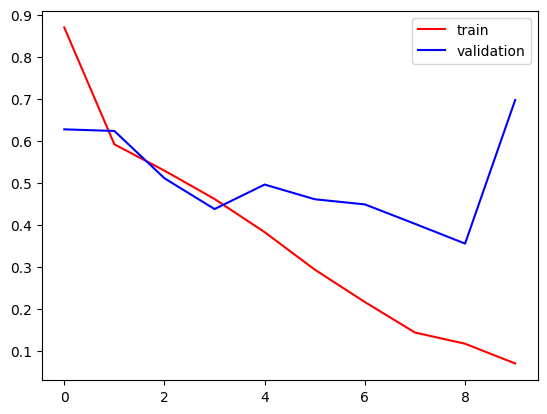

In [ ]:
# Training graph for accuracy

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


## Testing Model

In [ ]:
test_img = cv2.imread('/content/dog 22.jpeg')
test_img

array([[[ 67,  48,  13],
        [ 84,  65,  30],
        [100,  81,  46],
        ...,
        [ 60,  44,  15],
        [ 62,  46,  17],
        [ 65,  49,  20]],

       [[ 67,  48,  13],
        [ 83,  64,  29],
        [ 98,  79,  44],
        ...,
        [ 61,  45,  16],
        [ 60,  44,  15],
        [ 61,  45,  16]],

       [[ 67,  48,  13],
        [ 80,  61,  26],
        [ 93,  74,  39],
        ...,
        [ 67,  51,  22],
        [ 62,  46,  17],
        [ 58,  42,  13]],

       ...,

       [[ 67,  52,  20],
        [ 70,  55,  23],
        [ 74,  56,  25],
        ...,
        [ 74,  51,  13],
        [ 73,  50,  12],
        [ 73,  50,  12]],

       [[ 62,  47,  15],
        [ 62,  47,  15],
        [ 65,  47,  16],
        ...,
        [ 76,  53,  15],
        [ 76,  53,  15],
        [ 76,  53,  15]],

       [[ 60,  45,  13],
        [ 57,  42,  10],
        [ 59,  41,  10],
        ...,
        [ 77,  54,  16],
        [ 78,  55,  17],
        [ 79,  56,  18]]

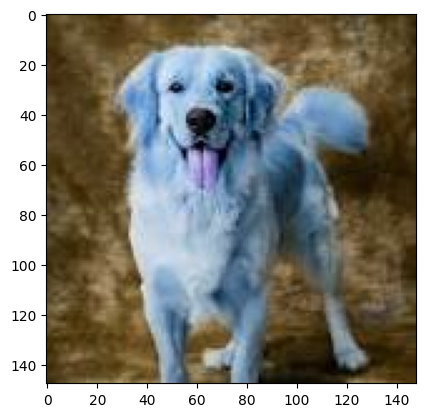

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 148, 3)

In [ ]:
test_image = cv2.resize(test_img, (256,256))

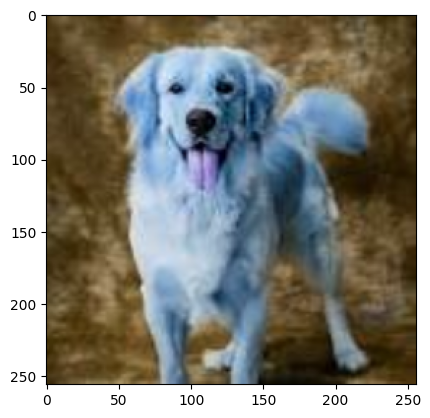

In [ ]:
plt.imshow(test_image)

In [ ]:

test_input = test_image.reshape(1,256,256,3)

In [ ]:
x = model.predict(test_input)
print(float(x))

1/1 [==============================] - 1s 560ms/step
1.0


In [ ]:
output = model.predict(test_input)[0][0]
print(f'Output is : {output} \n')
if output > 0.5:
  print('This is a Dog')
else:
  print('This is a Cat')

1/1 [==============================] - 0s 18ms/step
Output is : 1.0 

This is a Dog


In [ ]:
%pwd

'/content'

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'Image Classification Model.joblib')



['Image Classification Model.joblib']

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save model to Google Drive
model.save('/content/drive/MyDrive/Image Recognition Model.h5')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('Image Recog.keras')

NameError: name 'model' is not defined